In [1]:
# Print many lines atsame time
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Importing Libraries

In [2]:
import numpy as np
import pandas as pd

# Importing Dataset

In [7]:
df = pd.read_csv('cheese.csv')
df.head()
df.shape
print()

,Unnamed: 0,RETAILER,VOLUME,DISP,PRICE
0,1,LOS ANGELES - LUCKY,21374,0.162000,2.578460
1,2,LOS ANGELES - RALPHS,6427,0.124113,3.727867
2,3,LOS ANGELES - VONS,17302,0.102000,2.711421
3,4,CHICAGO - DOMINICK,13561,0.027591,2.651206
4,5,CHICAGO - JEWEL,42774,0.090613,1.986674


(5555, 5)

In [8]:
df_pivot = pd.pivot_table(df, values = ['VOLUME', 'DISP','PRICE'], index = 'RETAILER', aggfunc = np.median)
df_pivot.head()
df_pivot.shape

,DISP,PRICE,VOLUME
RETAILER,,,
"ALBANY,NY - PRICE CHOPPER",0.000000,2.864821,717.0
ATLANTA - KROGER CO,0.030872,2.701700,4455.0
ATLANTA - WINN DIXIE,0.000000,2.692330,2848.0
BALTI/WASH - GIANT FOOD INC,0.000000,3.783658,4337.0
BALTI/WASH - SAFEWAY,0.000000,3.987125,3832.0


(88, 3)

# 

In [10]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cross_validation import train_test_split
scld = MinMaxScaler(feature_range=(0,1))
arr_scld = scld.fit_transform(df_pivot)
df_scld = pd.DataFrame(arr_scld, columns = df_pivot.columns)
df_scld.head()
df_scld.describe()
df_scld.shape


,DISP,PRICE,VOLUME
0,0.000000,0.318908,0.017176
1,0.073857,0.250296,0.285807
2,0.000000,0.246355,0.170320
3,0.000000,0.705388,0.277327
4,0.000000,0.790969,0.241035


,DISP,PRICE,VOLUME
count,88.000000,88.000000,88.000000
mean,0.201006,0.337239,0.252149
std,0.234245,0.214843,0.204063
min,0.000000,0.000000,0.000000
25%,0.000000,0.173638,0.105704
50%,0.099057,0.254668,0.217822
75%,0.343301,0.456079,0.326105
max,1.000000,1.000000,1.000000


(88, 3)

# Lets build the cluster

In [16]:
from sklearn.cluster import KMeans
num_of_clusters = range (2,10)
error = []

for num_clusters in num_of_clusters:
    clusters = KMeans(num_clusters)
    clusters.fit(df_scld)
    error.append(clusters.inertia_/100)
    
df = pd.DataFrame({'Cluster_Numbers':num_of_clusters, 'Error_Term':error})
df

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=7, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=9, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

,Cluster_Numbers,Error_Term
0,2,0.087082
1,3,0.063298
2,4,0.044077
3,5,0.035960
4,6,0.030884
5,7,0.027030
6,8,0.022802
7,9,0.020605


# Find out the right number of cluster

<Figure size 1080x720 with 0 Axes>

Text(0.5, 0, 'Number of Clusters')

Text(0, 0.5, 'SSE')

Text(0.5, 1.0, 'Find the optimal Nuber of Clusters')

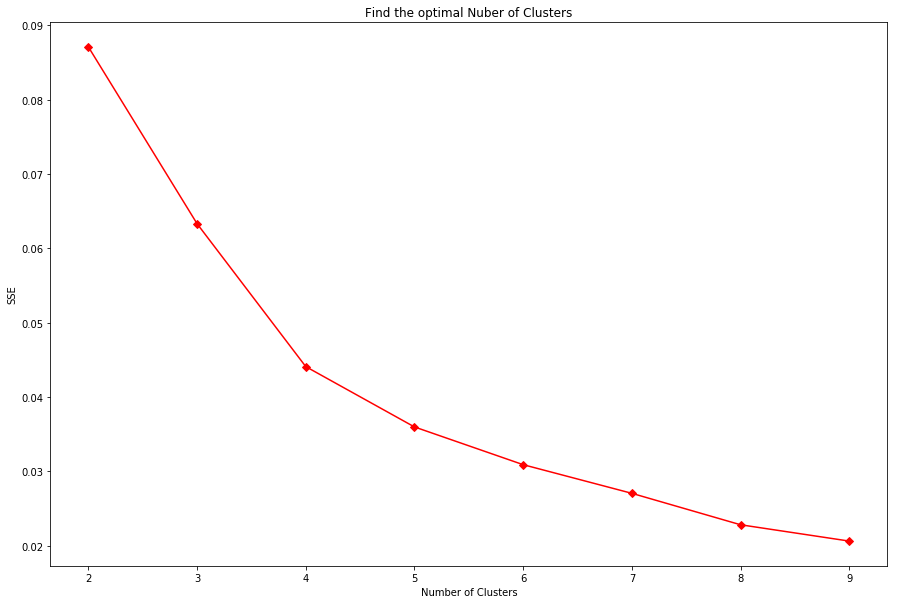

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize = (15,10))
plt.plot(df.Cluster_Numbers, df.Error_Term, marker = 'D', color = 'r')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.title('Find the optimal Nuber of Clusters')
plt.show()
%matplotlib inline

# Build with 4 clusters

In [18]:
clusters = KMeans(4)
clusters.fit(df_scld)
clusters.labels_

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

array([2, 2, 2, 0, 0, 0, 1, 2, 2, 2, 2, 2, 0, 0, 3, 2, 2, 3, 3, 1, 2, 2,
       2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 3, 0, 1, 0, 3, 3, 2, 2, 2, 1, 3, 0,
       2, 2, 1, 1, 2, 3, 3, 2, 0, 0, 0, 3, 2, 2, 2, 0, 0, 0, 3, 0, 2, 2,
       2, 2, 2, 2, 3, 3, 1, 3, 3, 0, 3, 2, 3, 0, 1, 0, 2, 3, 2, 2, 2, 0])

In [19]:
df_pivot['Cluster'] = clusters.labels_
df_pivot.head()
df_pivot.tail()
df_pivot.shape

,DISP,PRICE,VOLUME,Cluster
RETAILER,,,,
"ALBANY,NY - PRICE CHOPPER",0.000000,2.864821,717.0,2
ATLANTA - KROGER CO,0.030872,2.701700,4455.0,2
ATLANTA - WINN DIXIE,0.000000,2.692330,2848.0,2
BALTI/WASH - GIANT FOOD INC,0.000000,3.783658,4337.0,0
BALTI/WASH - SAFEWAY,0.000000,3.987125,3832.0,0


,DISP,PRICE,VOLUME,Cluster
RETAILER,,,,
SYRACUSE - WEGMANS,0.227423,3.459383,807.0,3
TAMPA/ST. PETE - KASH N KARRY,0.000000,2.877614,3797.0,2
TAMPA/ST. PETE - PUBLIX,0.036500,2.769338,5021.0,2
TAMPA/ST. PETE - WINN DIXIE,0.014416,2.599700,5169.0,2
WICHITA - DILLON COMPANIES,0.000000,3.378888,1187.5,0


(88, 4)

In [22]:
clust_profile = pd.pivot_table(df_pivot, values = ['VOLUME', 'DISP','PRICE'], index = 'Cluster', aggfunc = np.mean)
np.round(clust_profile,2)
df_pivot.groupby('Cluster').size()

,DISP,PRICE,VOLUME
Cluster,,,
0,0.06,3.58,3149.14
1,0.08,2.75,10864.50
2,0.03,2.63,3307.10
3,0.24,2.77,3463.58


Cluster
0    22
1     8
2    40
3    18
dtype: int64